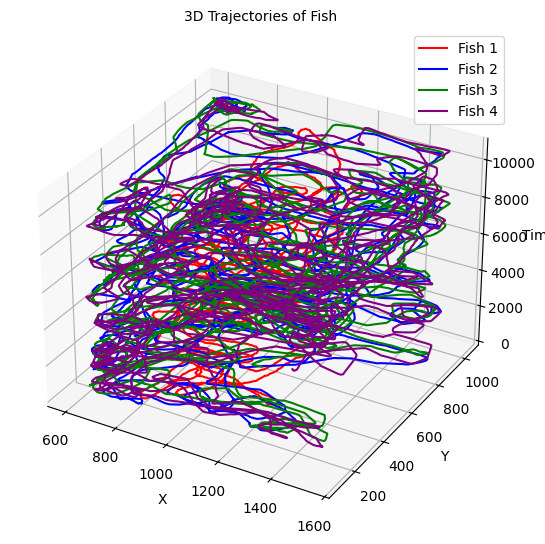

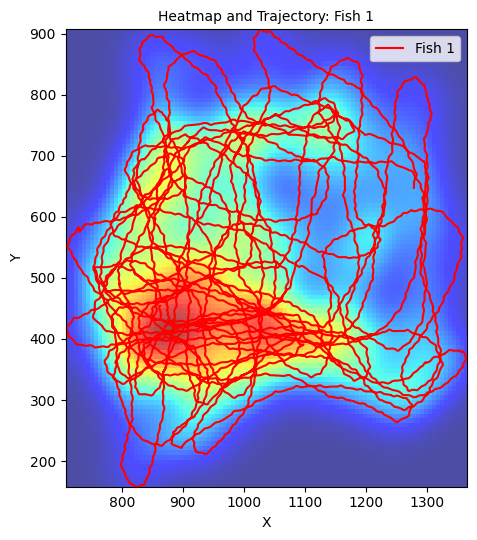

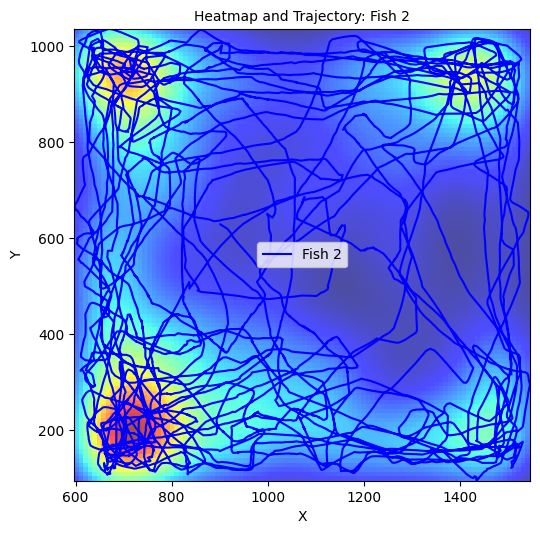

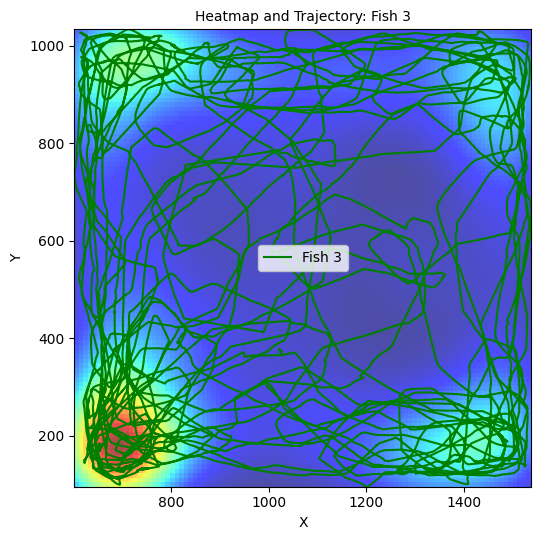

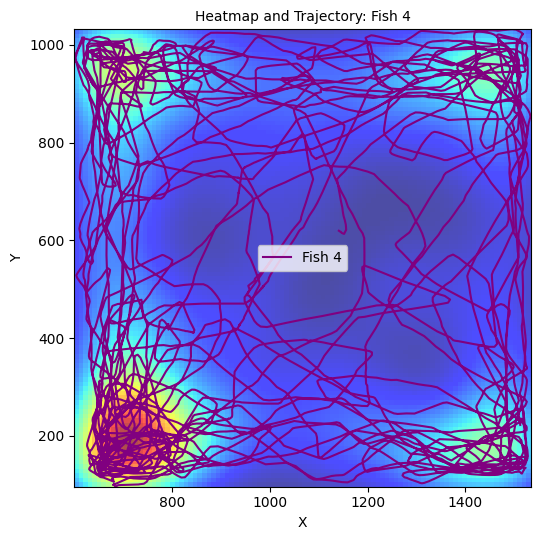

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

colors = ['red', 'blue', 'green', 'purple']

# Create 3D Trajectory Plot
fig_3d = plt.figure(figsize=(5.5, 5.5))
ax = fig_3d.add_subplot(111, projection='3d')

for i, coords in enumerate(fish_coords):
    ax.plot(coords[:, 0], coords[:, 1], zs=np.arange(len(coords)), color=colors[i], label=f'Fish {i+1}')
ax.set_title("3D Trajectories of Fish", fontsize=10)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Time")
ax.legend()
fig_3d.tight_layout()
fig_3d.savefig("3D_Trajectories.png", dpi=700)

# Create 2D Heatmap
for i, coords in enumerate(fish_coords):
    x, y = coords[:, 0], coords[:, 1]
    kde = gaussian_kde(np.vstack([x, y]))
    xi, yi = np.linspace(x.min(), x.max(), 100), np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = kde(np.vstack([xi.flatten(), yi.flatten()])).reshape(xi.shape)

    fig_heatmap = plt.figure(figsize=(5.5, 5.5))
    ax2 = fig_heatmap.add_subplot(111)
    ax2.imshow(zi, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='jet', alpha=0.7)
    ax2.plot(x, y, label=f'Fish {i+1}', color=colors[i])
    ax2.set_title(f"Heatmap and Trajectory: Fish {i+1}", fontsize=10)
    ax2.set_xlabel("X")
    ax2.set_ylabel("Y")
    ax2.legend()
    fig_heatmap.tight_layout()
    fig_heatmap.savefig(f"Heatmap_Fish_{i+1}.png", dpi=700)

plt.show('all')

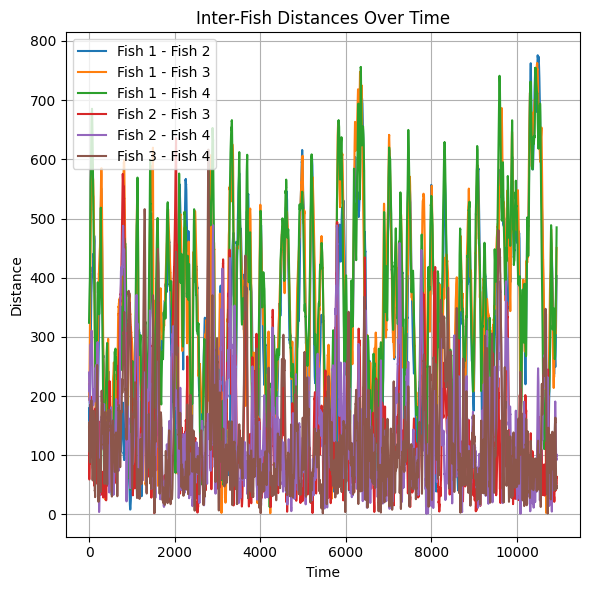

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Calculate pairwise distances
distances = []
fish_names = ['Fish 1', 'Fish 2', 'Fish 3', 'Fish 4']

for t in range(len(fish_coords[0])):
    row = []
    for i in range(len(fish_coords)):
        for j in range(i + 1, len(fish_coords)):
            # Compute Euclidean distance
            x1, y1 = fish_coords[i][t]
            x2, y2 = fish_coords[j][t]
            distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            row.append(distance)
    distances.append(row)

# Pairwise combinations
distance_labels = [
    f"{fish_names[i]} - {fish_names[j]}"
    for i in range(len(fish_names)) for j in range(i + 1, len(fish_names))
]

# Create DataFrame
distances_df = pd.DataFrame(distances, columns=distance_labels)
distances_df['Time'] = np.arange(len(distances))
distances_df.set_index('Time', inplace=True)

# Plot the distances
plt.figure(figsize=(6, 6))
for label in distance_labels:
    plt.plot(distances_df.index, distances_df[label], label=label)
plt.title("Inter-Fish Distances Over Time")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("InterFish_Distances.png", dpi=600)
plt.show()


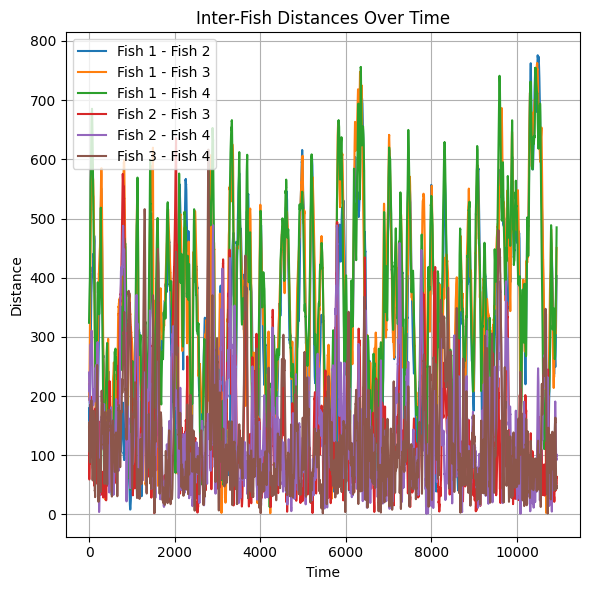

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Calculate pairwise distances
distances = []
fish_names = ['Fish 1', 'Fish 2', 'Fish 3', 'Fish 4']

for t in range(len(fish_coords[0])):
    row = []
    for i in range(len(fish_coords)):
        for j in range(i + 1, len(fish_coords)):
            # Compute Euclidean distance
            x1, y1 = fish_coords[i][t]
            x2, y2 = fish_coords[j][t]
            distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            row.append(distance)
    distances.append(row)

# Pairwise combinations
distance_labels = [
    f"{fish_names[i]} - {fish_names[j]}"
    for i in range(len(fish_names)) for j in range(i + 1, len(fish_names))
]

# Create DataFrame
distances_df = pd.DataFrame(distances, columns=distance_labels)
distances_df['Time'] = np.arange(len(distances))
distances_df.set_index('Time', inplace=True)

# Plot the distances
plt.figure(figsize=(6, 6))
for label in distance_labels:
    plt.plot(distances_df.index, distances_df[label], label=label)
plt.title("Inter-Fish Distances Over Time")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("InterFish_Distances.png", dpi=700)
plt.show()

       Fish 1 - Fish 2  Fish 1 - Fish 3  Fish 1 - Fish 4  Fish 2 - Fish 3  \
Time                                                                        
0           179.129282       219.561820       323.887761       147.422769   
1           175.212793       210.814383       327.311197       120.086234   
2           169.204003       202.084617       328.445448       100.554169   
3           166.562037       197.883700       329.835833        89.438266   
4           164.126367       193.428986       333.484204        74.597401   
...                ...              ...              ...              ...   
10920       374.710839       435.500045       458.635214        64.308461   
10921       381.650001       438.536671       464.250374        59.042954   
10922       390.022285       443.365665       470.278194        54.952525   
10923       398.573065       447.769941       478.185421        50.790984   
10924       402.884706       450.207653       485.064441        49.350199   

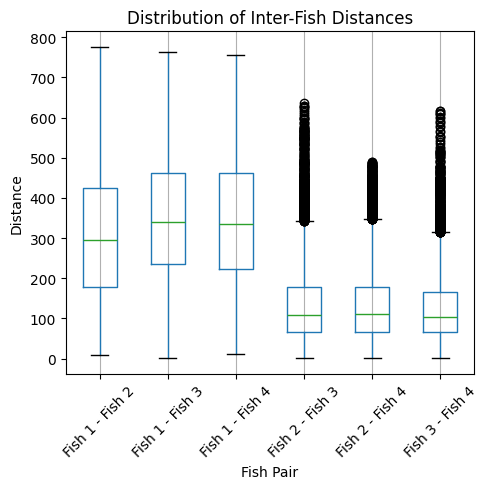

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Calculate pairwise distances
distances = []
fish_names = ['Fish 1', 'Fish 2', 'Fish 3', 'Fish 4']

for t in range(len(fish_coords[0])):
    row = []
    for i in range(len(fish_coords)):
        for j in range(i + 1, len(fish_coords)):
            # Compute Euclidean distance
            x1, y1 = fish_coords[i][t]
            x2, y2 = fish_coords[j][t]
            distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            row.append(distance)
    distances.append(row)

# Pairwise combinations
distance_labels = [
    f"{fish_names[i]} - {fish_names[j]}"
    for i in range(len(fish_names)) for j in range(i + 1, len(fish_names))
]

# Create DataFrame
distances_df = pd.DataFrame(distances, columns=distance_labels)
distances_df['Time'] = np.arange(len(distances))
distances_df.set_index('Time', inplace=True)

# Display the DataFrame
print(distances_df)

# Create Box-and-Whisker Plot
plt.figure(figsize=(5, 5))
distances_df.boxplot(column=distance_labels)
plt.title("Distribution of Inter-Fish Distances")
plt.ylabel("Distance")
plt.xlabel("Fish Pair")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

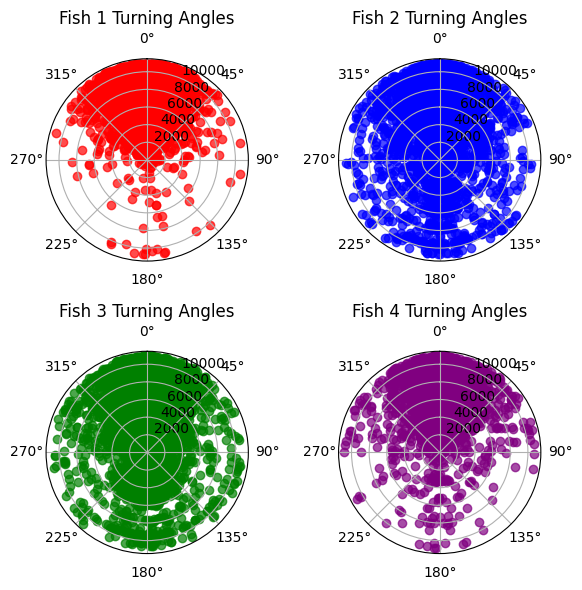

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

def calculate_turning_angles(coords):
    # Calculate differences
    dx = np.diff(coords[:, 0])
    dy = np.diff(coords[:, 1])
    # Calculate angles in radians
    angles = np.arctan2(dy, dx)
    # Calculate turning angles
    turning_angles = np.diff(angles)
    # Normalize to [-pi, pi]
    turning_angles = (turning_angles + np.pi) % (2 * np.pi) - np.pi
    return turning_angles

# Calculate turning angles for each fish
turning_angles = {f"Fish {i+1}": calculate_turning_angles(coords) for i, coords in enumerate(fish_coords)}

# Create Polar Scatter Plots
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(6, 6))

colors = ['red', 'blue', 'green', 'purple']
for i, (fish, angles) in enumerate(turning_angles.items()):
    ax = axes.flatten()[i]
    # Create polar scatter plot
    radii = np.arange(len(angles))
    ax.scatter(angles, radii, color=colors[i], alpha=0.7)
    ax.set_title(f"{fish} Turning Angles")
    ax.set_theta_direction(-1)  # Reverse the direction for conventional polar plots
    ax.set_theta_offset(np.pi / 2)  # Rotate so 0 is at the top

plt.tight_layout()
plt.show()

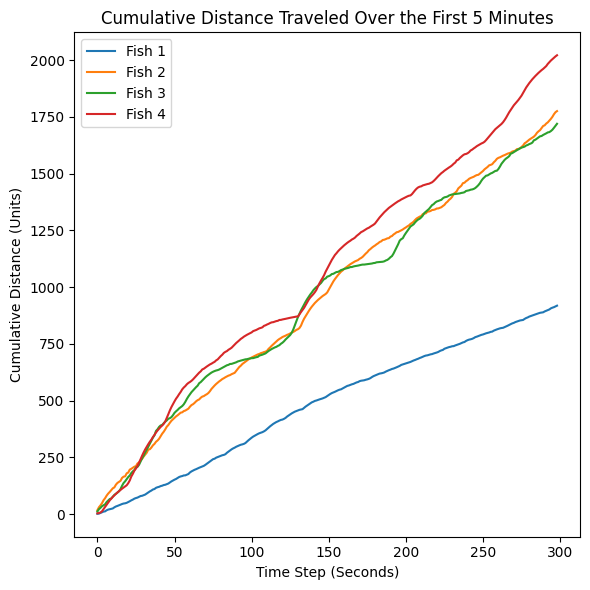

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Assuming the data is sampled at 1Hz (1 point per second) and focusing on the first 5 minutes (300 seconds)
# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Define the time frame (first 5 minutes = 300 data points)
time_frame = 300  # 5 minutes

def calculate_distance_traveled_for_time_frame(coords, time_frame):
    # Calculate Euclidean distance between consecutive points for the given time frame
    coords = coords[:time_frame]  # Limit to the first 5 minutes of data
    distances = np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2)
    # Calculate cumulative distance for the time frame
    cumulative_distances = np.cumsum(distances)
    return cumulative_distances

# Calculate cumulative distances for each fish for the first 5 minutes
cumulative_distances = {f"Fish {i+1}": calculate_distance_traveled_for_time_frame(coords, time_frame) 
                        for i, coords in enumerate(fish_coords)}

# Create a DataFrame for plotting
cumulative_df = pd.DataFrame(cumulative_distances)

# Plot the cumulative distances for the first 5 minutes
plt.figure(figsize=(6, 6))
for fish in cumulative_df.columns:
    plt.plot(cumulative_df.index, cumulative_df[fish], label=fish)
plt.title("Cumulative Distance Traveled Over the First 5 Minutes")
plt.xlabel("Time Step (Seconds)")
plt.ylabel("Cumulative Distance (Units)")
plt.legend()
plt.tight_layout()
plt.show()


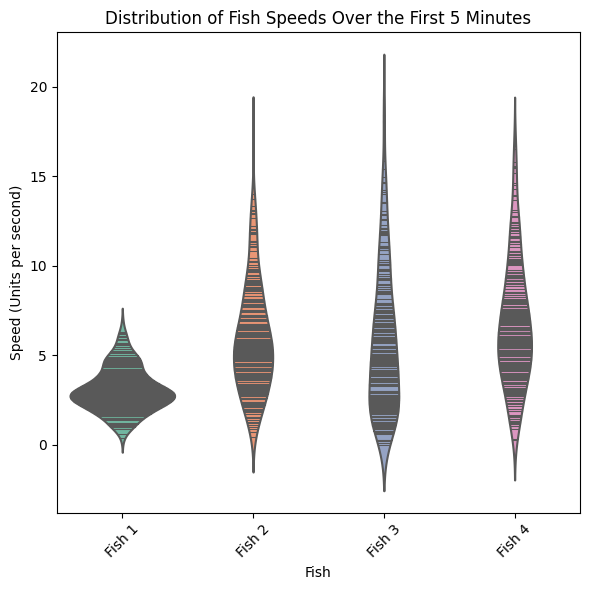

Mean Speeds for Each Fish (first 5 minutes):
Fish 1    3.071400
Fish 2    5.937107
Fish 3    5.749999
Fish 4    6.759595
dtype: float64


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Assuming the data is sampled at 1Hz (1 point per second) and focusing on the first 5 minutes (300 seconds)
time_frame = 300  # 5 minutes

# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

def calculate_speeds(coords, time_frame):
    # Calculate Euclidean distance between consecutive points for the given time frame
    coords = coords[:time_frame]  # Limit to the first 5 minutes of data
    distances = np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2)
    # Calculate speed (distance per time step)
    speeds = distances  # Since we're assuming 1Hz data, speed is just the distance
    return speeds

# Calculate speeds for each fish for the first 5 minutes
speeds = {f"Fish {i+1}": calculate_speeds(coords, time_frame) for i, coords in enumerate(fish_coords)}

# Create a DataFrame for plotting
speeds_df = pd.DataFrame(speeds)

# Calculate the mean speed for each fish
mean_speeds = speeds_df.mean()

# Create a violin plot with density
plt.figure(figsize=(6, 6))
sns.violinplot(data=speeds_df, inner="stick", linewidth=1.5, palette="Set2")
plt.title("Distribution of Fish Speeds Over the First 5 Minutes")
plt.xlabel("Fish")
plt.ylabel("Speed (Units per second)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Fish_Speed_Distribution.png", dpi=300)
plt.show()

# Print the mean speeds for each fish
print("Mean Speeds for Each Fish (first 5 minutes):")
print(mean_speeds)

/var/folders/yv/_h8yc74n25xgwb58606g_n8r0000gn/T/ipykernel_1110/1127836004.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(features_df['Mean Speed'][i], features_df['Total Distance'][i], label, fontsize=9, ha='right')


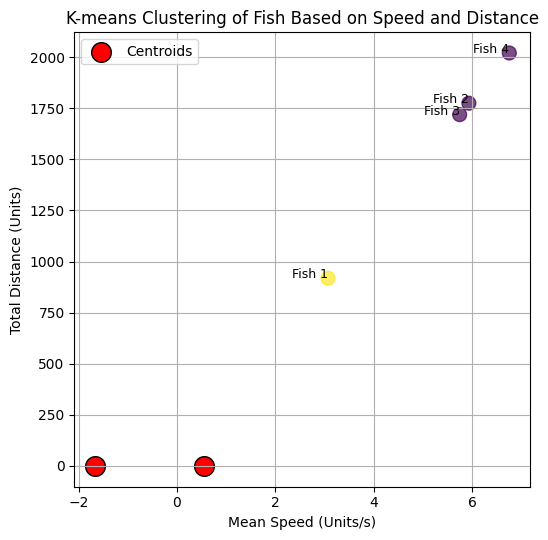

        Mean Speed  Total Distance  Cluster
Fish 1    3.071400      918.348472        1
Fish 2    5.937107     1775.194896        0
Fish 3    5.749999     1719.249705        0
Fish 4    6.759595     2021.119022        0

Cluster Centroids (in scaled space):
[[ 0.55524201  0.55524201]
 [-1.66572604 -1.66572604]]


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Assuming the data is sampled at 1Hz (1 point per second) and focusing on the first 5 minutes (300 seconds)
time_frame = 300  # 5 minutes

# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

def calculate_features(coords, time_frame):
    # Calculate Euclidean distances
    coords = coords[:time_frame]  # Limit to the first 5 minutes of data
    distances = np.sqrt(np.diff(coords[:, 0])**2 + np.diff(coords[:, 1])**2)
    # Total distance
    total_distance = np.sum(distances)
    # Mean speed (distance per time step)
    mean_speed = np.mean(distances)
    return mean_speed, total_distance

# Calculate features for each fish
features = []
for coords in fish_coords:
    mean_speed, total_distance = calculate_features(coords, time_frame)
    features.append([mean_speed, total_distance])

# Convert to DataFrame for easy handling
features_df = pd.DataFrame(features, columns=['Mean Speed', 'Total Distance'], index=[f'Fish {i+1}' for i in range(len(features))])

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters
clusters = kmeans.fit_predict(scaled_features)

# Add cluster assignments to DataFrame
features_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(5.5, 5.5))
plt.scatter(features_df['Mean Speed'], features_df['Total Distance'], c=features_df['Cluster'], cmap='viridis', s=100, alpha=0.7)
for i, label in enumerate(features_df.index):
    plt.text(features_df['Mean Speed'][i], features_df['Total Distance'][i], label, fontsize=9, ha='right')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', edgecolor='k')
plt.title("K-means Clustering of Fish Based on Speed and Distance")
plt.xlabel("Mean Speed (Units/s)")
plt.ylabel("Total Distance (Units)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Print DataFrame with Cluster Assignments
print(features_df)
print("\nCluster Centroids (in scaled space):")
print(kmeans.cluster_centers_)


/var/folders/yv/_h8yc74n25xgwb58606g_n8r0000gn/T/ipykernel_1110/1505530763.py:53: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(movement_df['mean_speed_left'][i], movement_df['mean_speed_right'][i], label, fontsize=9, ha='right')


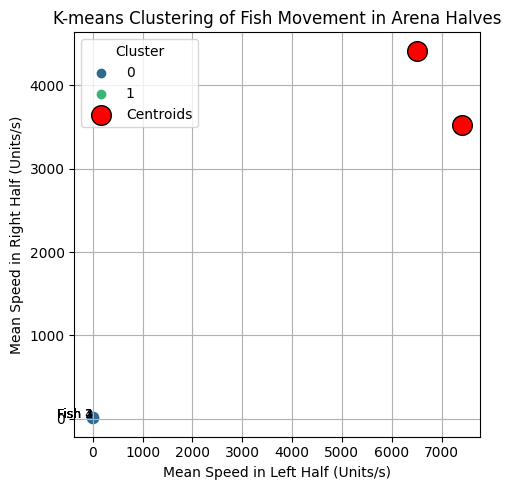

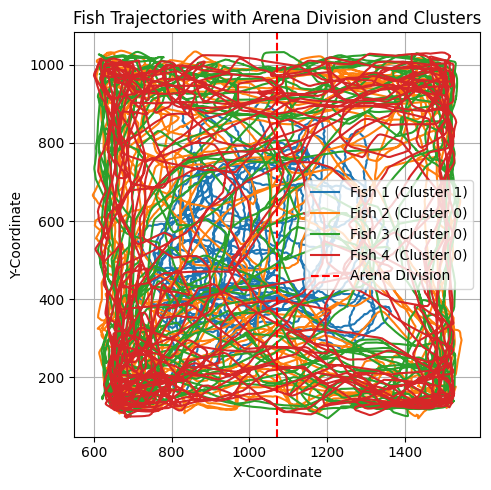

Movement Features with Cluster Assignments:
        time_in_left  time_in_right  mean_speed_left  mean_speed_right  \
Fish 1          7402           3523         2.805844          3.471402   
Fish 2          6517           4408         5.994292          7.376401   
Fish 3          6562           4363         6.424589          8.288196   
Fish 4          6447           4478         6.673863          8.257491   

        Cluster  
Fish 1        1  
Fish 2        0  
Fish 3        0  
Fish 4        0  


In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Divide arena into two halves along the X-axis
arena_mid_x = (data[['X1', 'X2', 'X3', 'X4']].max().max() + data[['X1', 'X2', 'X3', 'X4']].min().min()) / 2

# Function to calculate movement features for each half
def calculate_movement_features(coords, midpoint):
    # Left and right halves
    left_half = coords[coords[:, 0] < midpoint]
    right_half = coords[coords[:, 0] >= midpoint]
    
    # Calculate features
    features = {
        'time_in_left': len(left_half),
        'time_in_right': len(right_half),
        'mean_speed_left': np.mean(np.sqrt(np.diff(left_half[:, 0])**2 + np.diff(left_half[:, 1])**2)) if len(left_half) > 1 else 0,
        'mean_speed_right': np.mean(np.sqrt(np.diff(right_half[:, 0])**2 + np.diff(right_half[:, 1])**2)) if len(right_half) > 1 else 0
    }
    return features

# Extract movement features for each fish
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

movement_features = []
for coords in fish_coords:
    movement_features.append(calculate_movement_features(coords, arena_mid_x))

# Convert to DataFrame
movement_df = pd.DataFrame(movement_features, columns=['time_in_left', 'time_in_right', 'mean_speed_left', 'mean_speed_right'],
                           index=[f'Fish {i+1}' for i in range(len(fish_coords))])

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(movement_df)

# Add cluster labels to the DataFrame
movement_df['Cluster'] = clusters

# Visualize clustering in the feature space
plt.figure(figsize=(5, 5))
sns.scatterplot(x=movement_df['mean_speed_left'], y=movement_df['mean_speed_right'], hue=movement_df['Cluster'],
                palette='viridis', s=100)
for i, label in enumerate(movement_df.index):
    plt.text(movement_df['mean_speed_left'][i], movement_df['mean_speed_right'][i], label, fontsize=9, ha='right')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', edgecolor='k')
plt.title("K-means Clustering of Fish Movement in Arena Halves")
plt.xlabel("Mean Speed in Left Half (Units/s)")
plt.ylabel("Mean Speed in Right Half (Units/s)")
plt.legend(title="Cluster")
plt.grid()
plt.tight_layout()
plt.savefig("KMeans_Arena_Halves.png", dpi=300)
plt.show()

# Visualize the arena and trajectories with cluster labels
plt.figure(figsize=(5, 5))
for i, coords in enumerate(fish_coords):
    plt.plot(coords[:, 0], coords[:, 1], label=f'Fish {i+1} (Cluster {clusters[i]})')
plt.axvline(x=arena_mid_x, color='red', linestyle='--', label='Arena Division')
plt.title("Fish Trajectories with Arena Division and Clusters")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("Fish_Trajectories_Arena_Halves.png", dpi=300)
plt.show()

# Print the movement feature DataFrame with cluster assignments
print("Movement Features with Cluster Assignments:")
print(movement_df)

Statistical Test: Paired t-test
Test Statistic: 11.3463, p-value: 0.0015


/var/folders/yv/_h8yc74n25xgwb58606g_n8r0000gn/T/ipykernel_1110/2316452885.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=distance_df.melt(var_name='Half', value_name='Distance'), x='Half', y='Distance', palette='pastel', ci='sd')


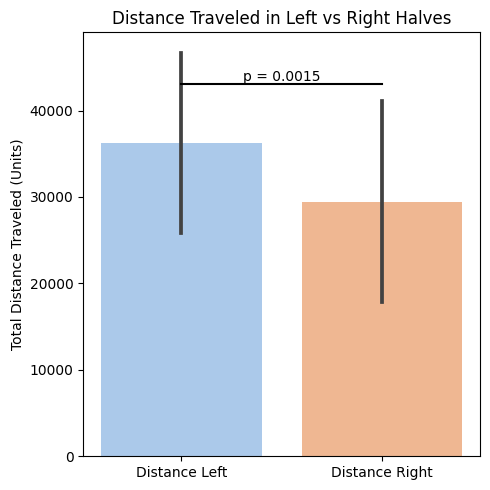


Distance Traveled in Left and Right Halves:
        Distance Left  Distance Right
Fish 1   20766.052113    12226.276293
Fish 2   39058.809326    32507.799063
Fish 3   42151.729040    36153.109741
Fish 4   43019.718554    36968.785322


In [11]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_rel, wilcoxon
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Divide arena into two halves along the X-axis
arena_mid_x = (data[['X1', 'X2', 'X3', 'X4']].max().max() + data[['X1', 'X2', 'X3', 'X4']].min().min()) / 2

# Extract fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Function to calculate distance in each half
def calculate_distance_in_halves(coords, midpoint):
    left_half = coords[coords[:, 0] < midpoint]
    right_half = coords[coords[:, 0] >= midpoint]
    
    # Calculate distances
    left_distances = np.sqrt(np.diff(left_half[:, 0])**2 + np.diff(left_half[:, 1])**2) if len(left_half) > 1 else [0]
    right_distances = np.sqrt(np.diff(right_half[:, 0])**2 + np.diff(right_half[:, 1])**2) if len(right_half) > 1 else [0]
    
    return np.sum(left_distances), np.sum(right_distances)

# Calculate distances for each fish
distances = [calculate_distance_in_halves(coords, arena_mid_x) for coords in fish_coords]
distance_df = pd.DataFrame(distances, columns=['Distance Left', 'Distance Right'], index=[f'Fish {i+1}' for i in range(len(fish_coords))])

# Perform normality test
stat, p_normality = shapiro(distance_df['Distance Left'] - distance_df['Distance Right'])
normality_passed = p_normality > 0.05

# Perform appropriate statistical test
if normality_passed:
    # Paired t-test
    t_stat, p_value = ttest_rel(distance_df['Distance Left'], distance_df['Distance Right'])
    test_name = "Paired t-test"
else:
    # Wilcoxon signed-rank test
    t_stat, p_value = wilcoxon(distance_df['Distance Left'], distance_df['Distance Right'])
    test_name = "Wilcoxon signed-rank test"

# Print statistical results
print(f"Statistical Test: {test_name}")
print(f"Test Statistic: {t_stat:.4f}, p-value: {p_value:.4f}")

# Bar plot for distances in left and right halves
plt.figure(figsize=(5, 5))
sns.barplot(data=distance_df.melt(var_name='Half', value_name='Distance'), x='Half', y='Distance', palette='pastel', ci='sd')

# Add significance annotation
x1, x2 = 0, 1  # x-coordinates for bars
y, h, col = distance_df[['Distance Left', 'Distance Right']].values.max() + 50, 30, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, color=col)
plt.text((x1+x2)*.5, y+h+10, f"p = {p_value:.4f}", ha='center', va='bottom', color=col)

# Plot aesthetics
plt.title("Distance Traveled in Left vs Right Halves")
plt.xlabel("")
plt.ylabel("Total Distance Traveled (Units)")
plt.tight_layout()
plt.show()

# Print the distance data
print("\nDistance Traveled in Left and Right Halves:")
print(distance_df)

Distance Model - MSE: 5.0362, R2: 0.6531
Speed Model - MSE: 4532.8516, R2: 0.6531


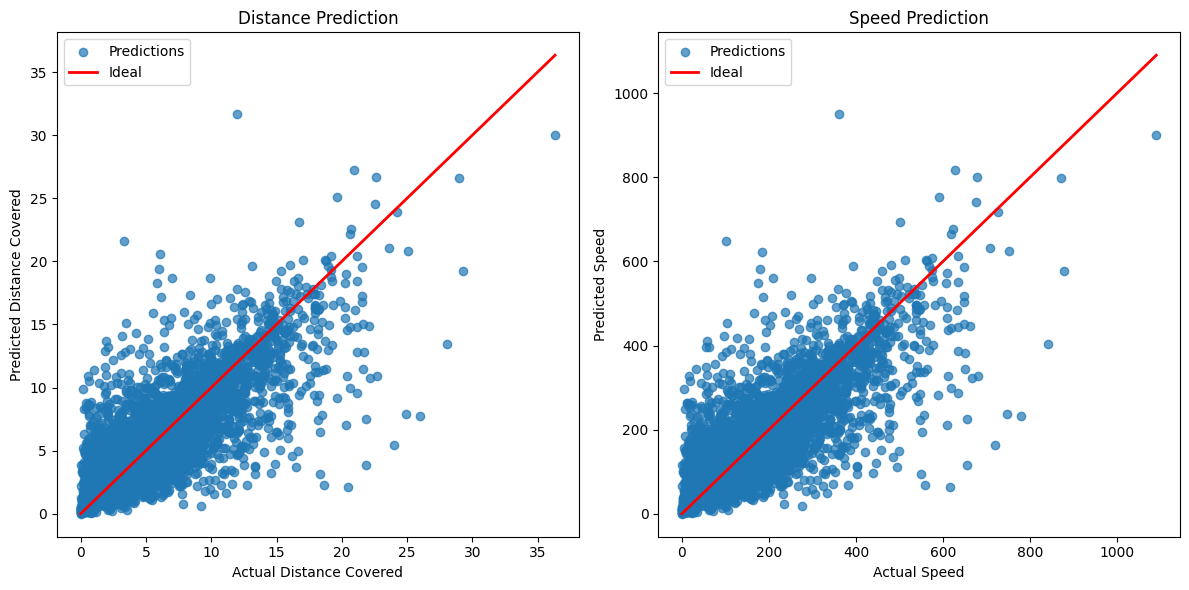

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Extract relevant features for the 4 fish (first 5 minutes of data)
fps = 30  # Frames per second
time_limit_frames = 5 * 60 * fps
data_5min = data.iloc[:time_limit_frames]  # Subset the first 5 minutes

fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data_5min[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Feature Engineering: Calculate speed and distance for each fish
def calculate_features(coords):
    # Time intervals (assuming constant frame rate)
    dt = 1 / fps  # Time per frame
    
    # Calculate distances and speeds
    dx = np.diff(coords[:, 0])
    dy = np.diff(coords[:, 1])
    distances = np.sqrt(dx**2 + dy**2)
    speeds = distances / dt
    
    # Return as feature matrix
    return {
        'time': np.arange(len(distances)) * dt,
        'distance': distances,
        'speed': speeds
    }

# Prepare data for all fish
features_list = []
for fish_idx, coords in enumerate(fish_coords):
    features = calculate_features(coords)
    fish_df = pd.DataFrame(features)
    fish_df['fish_id'] = fish_idx + 1
    features_list.append(fish_df)

# Combine features into a single DataFrame
features_df = pd.concat(features_list, ignore_index=True)

# Define features (X) and targets (y)
X = features_df[['time', 'fish_id']]
y_distance = features_df['distance']  # Target: Distance covered
y_speed = features_df['speed']       # Target: Speed

# Split data into training and testing sets
X_train, X_test, y_distance_train, y_distance_test = train_test_split(X, y_distance, test_size=0.2, random_state=42)
_, _, y_speed_train, y_speed_test = train_test_split(X, y_speed, test_size=0.2, random_state=42)

# Train a Random Forest Regressor for both distance and speed
distance_model = RandomForestRegressor(random_state=42)
distance_model.fit(X_train, y_distance_train)

speed_model = RandomForestRegressor(random_state=42)
speed_model.fit(X_train, y_speed_train)

# Predict on the test set
y_distance_pred = distance_model.predict(X_test)
y_speed_pred = speed_model.predict(X_test)

# Evaluate the models
distance_mse = mean_squared_error(y_distance_test, y_distance_pred)
distance_r2 = r2_score(y_distance_test, y_distance_pred)

speed_mse = mean_squared_error(y_speed_test, y_speed_pred)
speed_r2 = r2_score(y_speed_test, y_speed_pred)

print(f"Distance Model - MSE: {distance_mse:.4f}, R2: {distance_r2:.4f}")
print(f"Speed Model - MSE: {speed_mse:.4f}, R2: {speed_r2:.4f}")

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))

# Distance Prediction
plt.subplot(1, 2, 1)
plt.scatter(y_distance_test, y_distance_pred, alpha=0.7, label='Predictions')
plt.plot([y_distance_test.min(), y_distance_test.max()], [y_distance_test.min(), y_distance_test.max()], color='red', lw=2, label='Ideal')
plt.xlabel('Actual Distance Covered')
plt.ylabel('Predicted Distance Covered')
plt.title('Distance Prediction')
plt.legend()

# Speed Prediction
plt.subplot(1, 2, 2)
plt.scatter(y_speed_test, y_speed_pred, alpha=0.7, label='Predictions')
plt.plot([y_speed_test.min(), y_speed_test.max()], [y_speed_test.min(), y_speed_test.max()], color='red', lw=2, label='Ideal')
plt.xlabel('Actual Speed')
plt.ylabel('Predicted Speed')
plt.title('Speed Prediction')
plt.legend()

plt.tight_layout()
plt.show()


Fish Behavior Classification (Speed Binned):
            Fish 1 Fish 2 Fish 3           Fish 4  Time
0     Medium Speed    NaN    NaN  Very High Speed     0
1        Low Speed    NaN    NaN     Medium Speed     1
2       High Speed    NaN    NaN       High Speed     2
3       High Speed    NaN    NaN              NaN     3
4       High Speed    NaN    NaN              NaN     4
...            ...    ...    ...              ...   ...
8994  Medium Speed    NaN    NaN  Very High Speed  8994
8995  Medium Speed    NaN    NaN              NaN  8995
8996     Low Speed    NaN    NaN              NaN  8996
8997     Low Speed    NaN    NaN              NaN  8997
8998  Medium Speed    NaN    NaN              NaN  8998

[8999 rows x 5 columns]


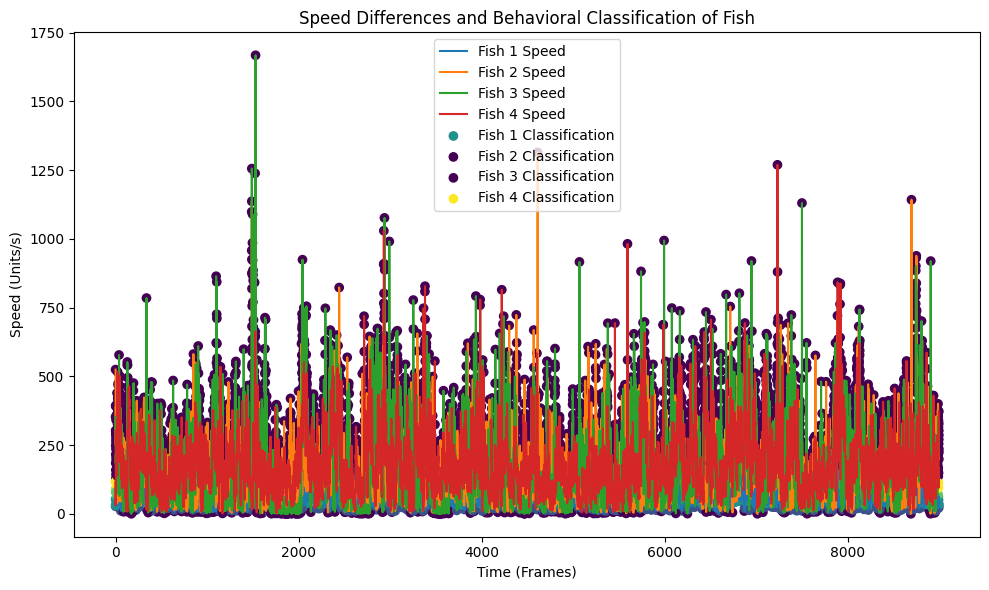

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data (replace with your actual path if necessary)
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Define the frame rate and extract the first 5 minutes of data
fps = 30  # Frames per second
time_limit_frames = 5 * 60 * fps  # 5 minutes of data
data_5min = data.iloc[:time_limit_frames]

# Define fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data_5min[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Function to calculate speed from coordinates
def calculate_speed(coords):
    dx = np.diff(coords[:, 0])
    dy = np.diff(coords[:, 1])
    distances = np.sqrt(dx**2 + dy**2)
    speed = distances * fps  # Multiply by fps to get speed in units per second
    return speed

# Calculate speeds for each fish
speeds = [calculate_speed(coords) for coords in fish_coords]

# Define speed bins
bins = [10, 30, 60, 90, 120]  # Defining speed ranges: 10-30, 30-60, ...
labels = ['Low Speed', 'Medium Speed', 'High Speed', 'Very High Speed']

# Classify fish behavior based on speed
behavior = {}
for i, speed in enumerate(speeds):
    # Use pandas cut function to classify speeds into bins
    behavior[f'Fish {i+1}'] = pd.cut(speed, bins=bins, labels=labels, right=False)

# Create a DataFrame for the classification results
behavior_df = pd.DataFrame(behavior)
behavior_df['Time'] = np.arange(len(speeds[0]))

# Print the data showing the classification of fish behavior
print("Fish Behavior Classification (Speed Binned):")
print(behavior_df)

# Plotting the speed differences between the fish
plt.figure(figsize=(10, 6))
for i, speed in enumerate(speeds):
    plt.plot(np.arange(len(speed)), speed, label=f'Fish {i+1} Speed')

# Plot classification points
plt.scatter(behavior_df['Time'], speeds[0], c=behavior_df['Fish 1'].cat.codes, cmap='viridis', label='Fish 1 Classification')
plt.scatter(behavior_df['Time'], speeds[1], c=behavior_df['Fish 2'].cat.codes, cmap='viridis', label='Fish 2 Classification')
plt.scatter(behavior_df['Time'], speeds[2], c=behavior_df['Fish 3'].cat.codes, cmap='viridis', label='Fish 3 Classification')
plt.scatter(behavior_df['Time'], speeds[3], c=behavior_df['Fish 4'].cat.codes, cmap='viridis', label='Fish 4 Classification')

plt.title("Speed Differences and Behavioral Classification of Fish")
plt.xlabel("Time (Frames)")
plt.ylabel("Speed (Units/s)")
plt.legend()
plt.tight_layout()
plt.show()

Fish Behavior Classification (Speed Binned):

Fish 1 Classification:
0       Medium Speed
1          Low Speed
2         High Speed
3         High Speed
4         High Speed
            ...     
8994    Medium Speed
8995    Medium Speed
8996       Low Speed
8997       Low Speed
8998    Medium Speed
Name: Fish 1, Length: 8999, dtype: category
Categories (4, object): ['Low Speed' < 'Medium Speed' < 'High Speed' < 'Very High Speed']

Fish 2 Classification:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8994    NaN
8995    NaN
8996    NaN
8997    NaN
8998    NaN
Name: Fish 2, Length: 8999, dtype: category
Categories (4, object): ['Low Speed' < 'Medium Speed' < 'High Speed' < 'Very High Speed']

Fish 3 Classification:
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
8994    NaN
8995    NaN
8996    NaN
8997    NaN
8998    NaN
Name: Fish 3, Length: 8999, dtype: category
Categories (4, object): ['Low Speed' < 'Medium Speed' < 'High Speed' < 'Very

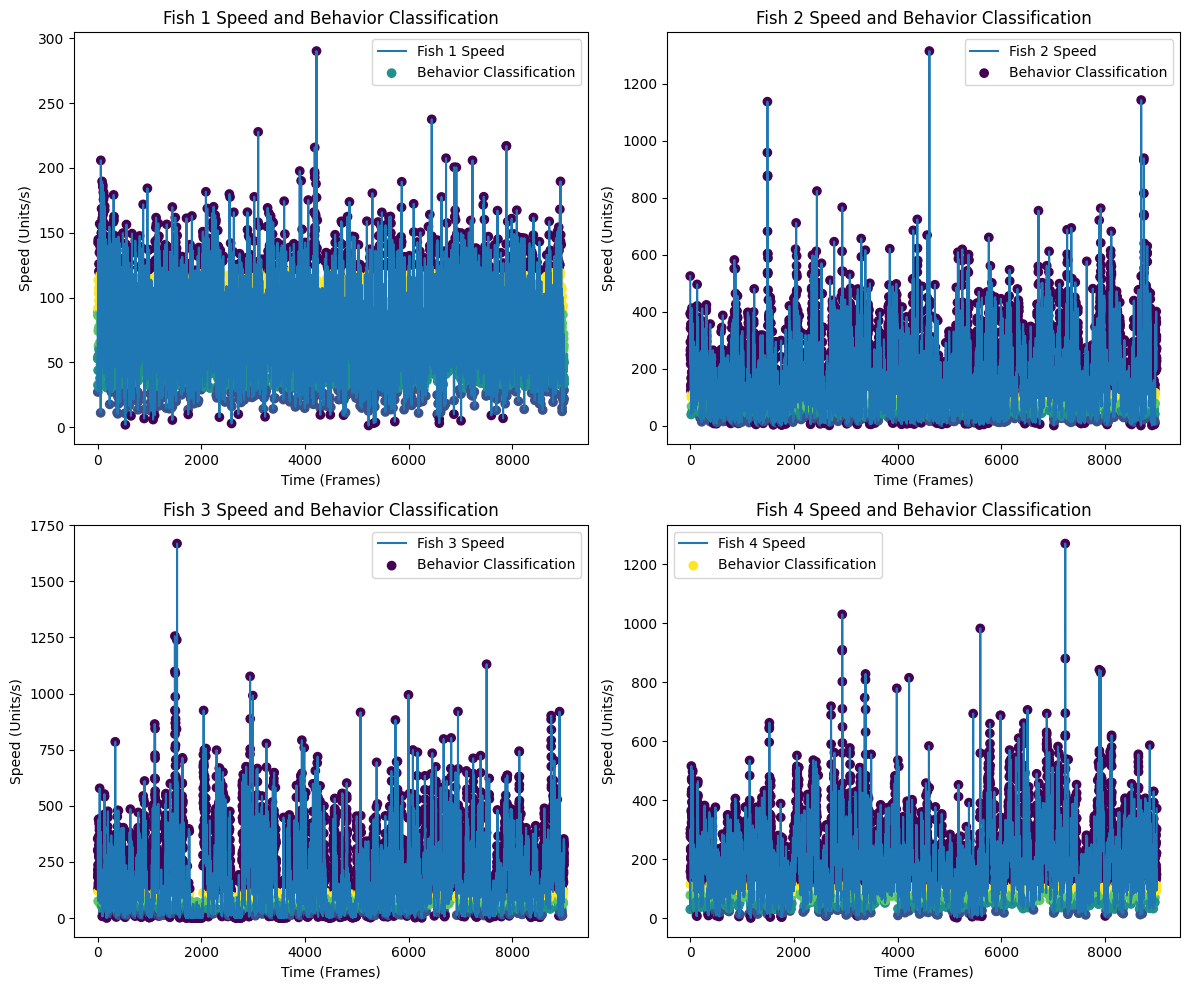

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'
data = pd.read_csv(file_path, sep='\t')

# Define the frame rate and extract the first 5 minutes of data
fps = 30  # Frames per second
time_limit_frames = 5 * 60 * fps  # 5 minutes of data
data_5min = data.iloc[:time_limit_frames]

# Define fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data_5min[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Function to calculate speed from coordinates
def calculate_speed(coords):
    dx = np.diff(coords[:, 0])
    dy = np.diff(coords[:, 1])
    distances = np.sqrt(dx**2 + dy**2)
    speed = distances * fps  # Multiply by fps to get speed in units per second
    return speed

# Define speed bins for classification
bins = [10, 30, 60, 90, 120]  # Speed ranges: 10-30, 30-60, ...
labels = ['Low Speed', 'Medium Speed', 'High Speed', 'Very High Speed']

# Function to classify behavior based on speed
def classify_behavior(speed):
    return pd.cut(speed, bins=bins, labels=labels, right=False)

# Calculate speeds and classify behavior for each fish
behavior = {}
for i, coords in enumerate(fish_coords):
    speed = calculate_speed(coords)
    behavior[f'Fish {i+1}'] = classify_behavior(speed)

# Create a DataFrame for the classification results for each fish
behavior_df = pd.DataFrame(behavior)

# Display the classification for each fish separately
print("Fish Behavior Classification (Speed Binned):")
for fish in behavior_df.columns:
    print(f"\n{fish} Classification:")
    print(behavior_df[fish])

# Plotting the speed and behavior for each fish separately
plt.figure(figsize=(12, 10))

for i, fish in enumerate(behavior_df.columns):
    plt.subplot(2, 2, i+1)
    plt.plot(np.arange(len(fish_coords[i]) - 1), calculate_speed(fish_coords[i]), label=f'Fish {i+1} Speed')
    plt.scatter(np.arange(len(fish_coords[i]) - 1), calculate_speed(fish_coords[i]), c=behavior_df[fish].cat.codes, cmap='viridis', label='Behavior Classification')
    plt.title(f'Fish {i+1} Speed and Behavior Classification')
    plt.xlabel('Time (Frames)')
    plt.ylabel('Speed (Units/s)')
    plt.legend()

plt.tight_layout()
plt.show()


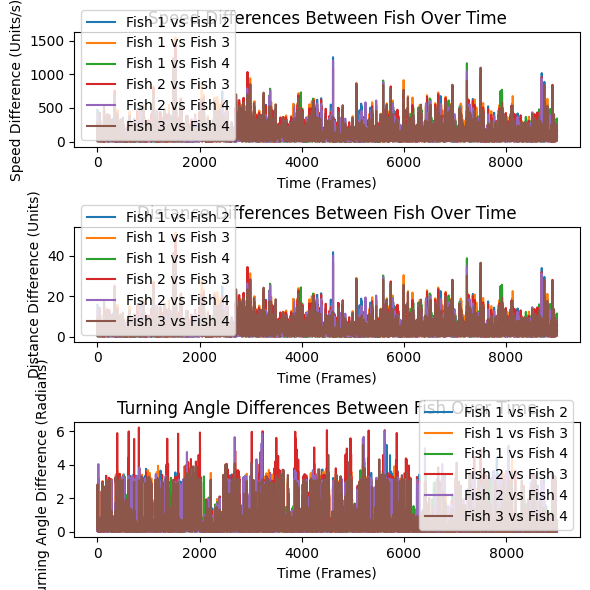

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'  # Replace with your actual file path
data = pd.read_csv(file_path, sep='\t')

# Assume you are working with the first 5 minutes of data
fps = 30  # Frames per second
time_limit_frames = 5 * 60 * fps  # 5 minutes
data_5min = data.iloc[:time_limit_frames]

# Define fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data_5min[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Function to calculate speed from coordinates
def calculate_speed(coords):
    dx = np.diff(coords[:, 0])
    dy = np.diff(coords[:, 1])
    distances = np.sqrt(dx**2 + dy**2)
    speed = distances * fps  # Multiply by fps to get speed in units per second
    return speed

# Function to calculate turning angles
def calculate_turning_angles(coords):
    dx = np.diff(coords[:, 0])
    dy = np.diff(coords[:, 1])
    angles = np.arctan2(dy, dx)  # Get angles in radians
    turning_angles = np.diff(angles)  # Calculate turning angles
    turning_angles = (turning_angles + np.pi) % (2 * np.pi) - np.pi  # Normalize to [-π, π]
    return turning_angles

# Function to calculate distance from coordinates
def calculate_distance(coords):
    dx = np.diff(coords[:, 0])
    dy = np.diff(coords[:, 1])
    distance = np.sqrt(dx**2 + dy**2)
    return distance

# Calculate speeds, turning angles, and distances for each fish
speeds = [calculate_speed(coords) for coords in fish_coords]
turning_angles = [calculate_turning_angles(coords) for coords in fish_coords]
distances = [calculate_distance(coords) for coords in fish_coords]

# Calculate pairwise differences (for each time step)
def calculate_pairwise_diff(data):
    diff = {}
    for i in range(4):
        for j in range(i + 1, 4):
            diff[f"Fish {i+1} vs Fish {j+1}"] = np.abs(data[i] - data[j])
    return diff

# Calculate speed differences
speed_differences = calculate_pairwise_diff(speeds)

# Calculate distance differences
distance_differences = calculate_pairwise_diff(distances)

# Calculate turning angle differences
turning_angle_differences = calculate_pairwise_diff(turning_angles)

# Plotting the differences over time
plt.figure(figsize=(6, 6))

# Plot speed differences
plt.subplot(3, 1, 1)
for pair, diff in speed_differences.items():
    plt.plot(np.arange(len(diff)), diff, label=pair)
plt.title("Speed Differences Between Fish Over Time")
plt.xlabel("Time (Frames)")
plt.ylabel("Speed Difference (Units/s)")
plt.legend()

# Plot distance differences
plt.subplot(3, 1, 2)
for pair, diff in distance_differences.items():
    plt.plot(np.arange(len(diff)), diff, label=pair)
plt.title("Distance Differences Between Fish Over Time")
plt.xlabel("Time (Frames)")
plt.ylabel("Distance Difference (Units)")
plt.legend()

# Plot turning angle differences
plt.subplot(3, 1, 3)
for pair, diff in turning_angle_differences.items():
    plt.plot(np.arange(len(diff)), diff, label=pair)
plt.title("Turning Angle Differences Between Fish Over Time")
plt.xlabel("Time (Frames)")
plt.ylabel("Turning Angle Difference (Radians)")
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


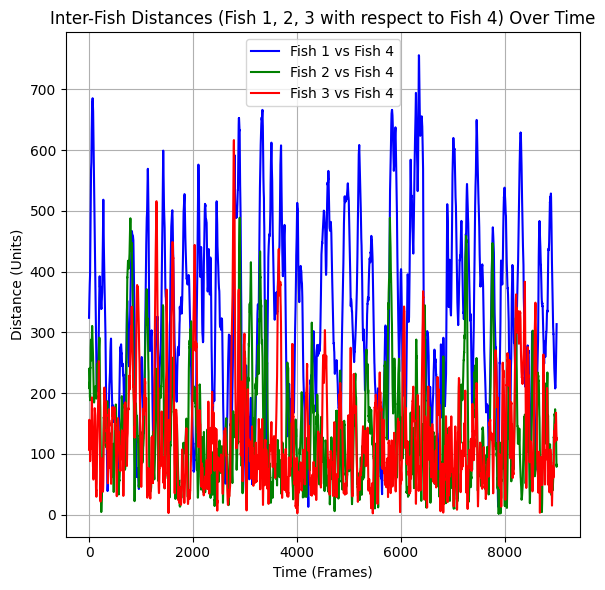

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = '/Users/sinan/Downloads/tg.txt'  # Replace with your actual file path
data = pd.read_csv(file_path, sep='\t')

# Define the frame rate and extract the first 5 minutes of data
fps = 30  # Frames per second
time_limit_frames = 5 * 60 * fps  # 5 minutes of data
data_5min = data.iloc[:time_limit_frames]

# Define fish coordinates
fish_columns = [('X1', 'Y1'), ('X2', 'Y2'), ('X3', 'Y3'), ('X4', 'Y4')]
fish_coords = [data_5min[list(pair)].dropna().to_numpy() for pair in fish_columns]

# Function to calculate Euclidean distance between two sets of coordinates (x1, y1) and (x2, y2)
def calculate_distance(coords1, coords2):
    dx = coords1[:, 0] - coords2[:, 0]
    dy = coords1[:, 1] - coords2[:, 1]
    return np.sqrt(dx**2 + dy**2)

# Calculate inter-fish distances (Fish 1, 2, and 3 with respect to Fish 4)
distances_fish_1_4 = calculate_distance(fish_coords[0], fish_coords[3])
distances_fish_2_4 = calculate_distance(fish_coords[1], fish_coords[3])
distances_fish_3_4 = calculate_distance(fish_coords[2], fish_coords[3])

# Plotting the inter-fish distances over time
plt.figure(figsize=(6, 6))

# Plot the inter-fish distances
plt.plot(np.arange(len(distances_fish_1_4)), distances_fish_1_4, label="Fish 1 vs Fish 4", color='blue')
plt.plot(np.arange(len(distances_fish_2_4)), distances_fish_2_4, label="Fish 2 vs Fish 4", color='green')
plt.plot(np.arange(len(distances_fish_3_4)), distances_fish_3_4, label="Fish 3 vs Fish 4", color='red')

# Add labels and legend
plt.title("Inter-Fish Distances (Fish 1, 2, 3 with respect to Fish 4) Over Time")
plt.xlabel("Time (Frames)")
plt.ylabel("Distance (Units)")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


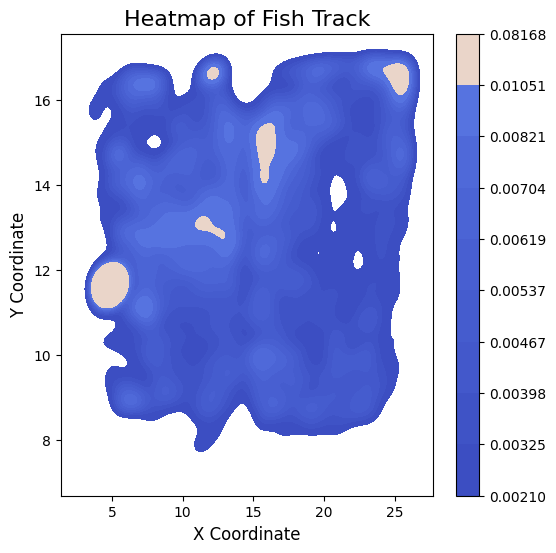

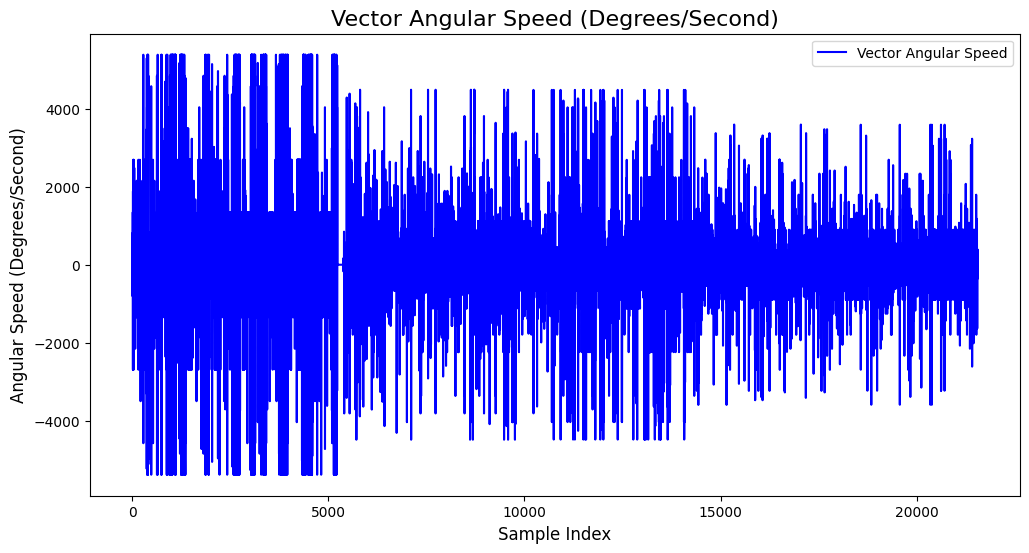

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/sinan/Downloads/avs-Track Coordinates Report.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Filter valid X and Y coordinates for the heatmap
coordinates = data[['X Coordinate', 'Y Coordinate']].dropna()

# Generate the heatmap for the movement track
plt.figure(figsize=(6, 6))
sns.kdeplot(x=coordinates['X Coordinate'], y=coordinates['Y Coordinate'], cmap='coolwarm', fill=True, cbar=True, bw_adjust=0.5)
plt.title('Heatmap of Fish Track', fontsize=16)
plt.xlabel('X Coordinate', fontsize=12)
plt.ylabel('Y Coordinate', fontsize=12)
plt.show()

# Plot the Vector Angular Speed (Degrees/Second)
vector_speed = data['Vector Angular Speed (Degrees/Second)'].dropna()

plt.figure(figsize=(12, 6))
plt.plot(vector_speed, label='Vector Angular Speed', color='blue')
plt.title('Vector Angular Speed (Degrees/Second)', fontsize=16)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Angular Speed (Degrees/Second)', fontsize=12)
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


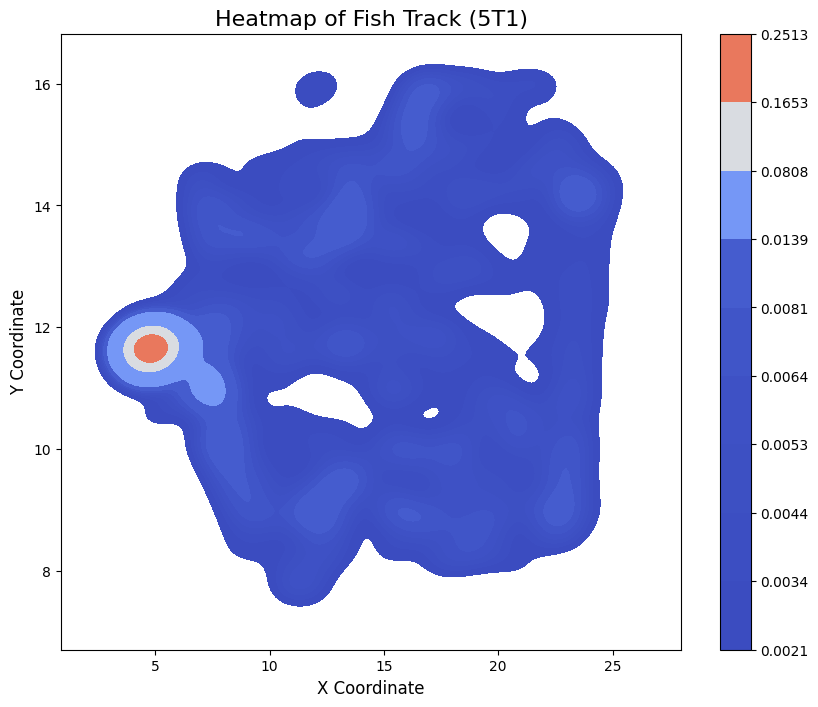

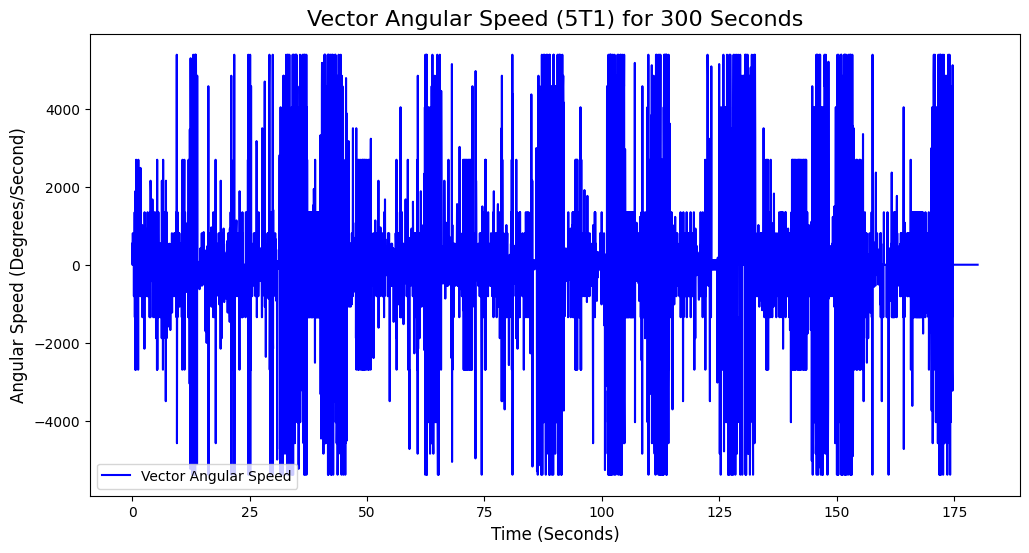

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


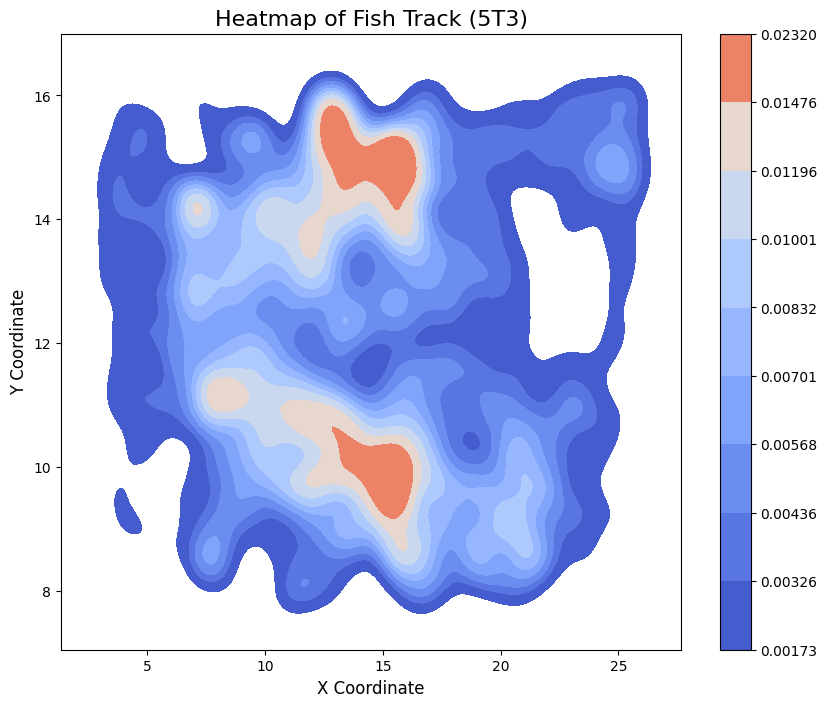

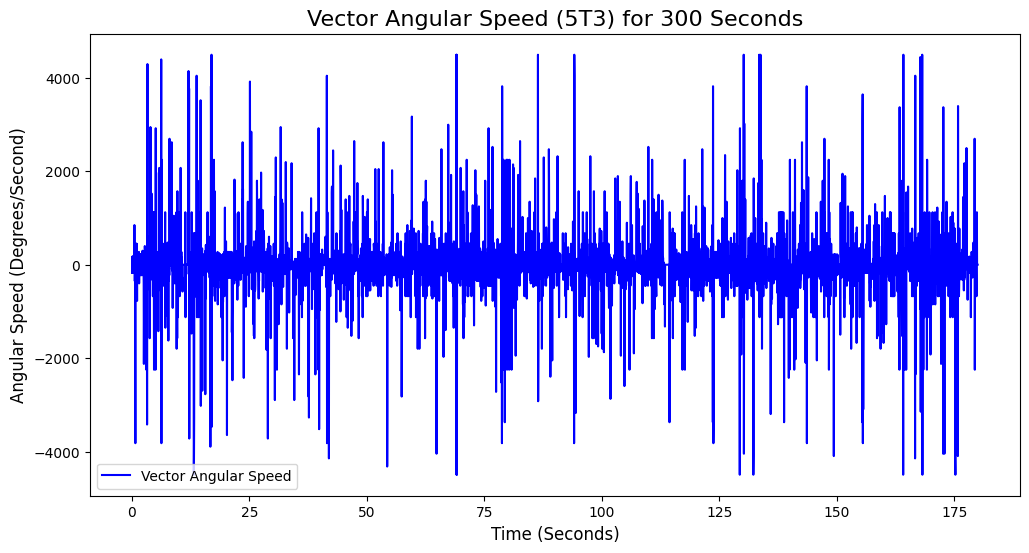

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


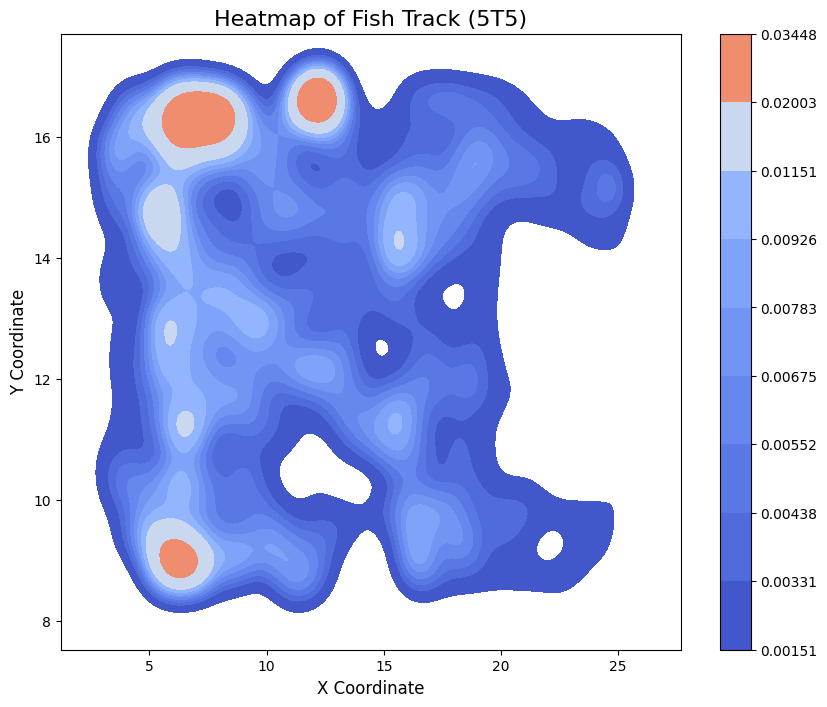

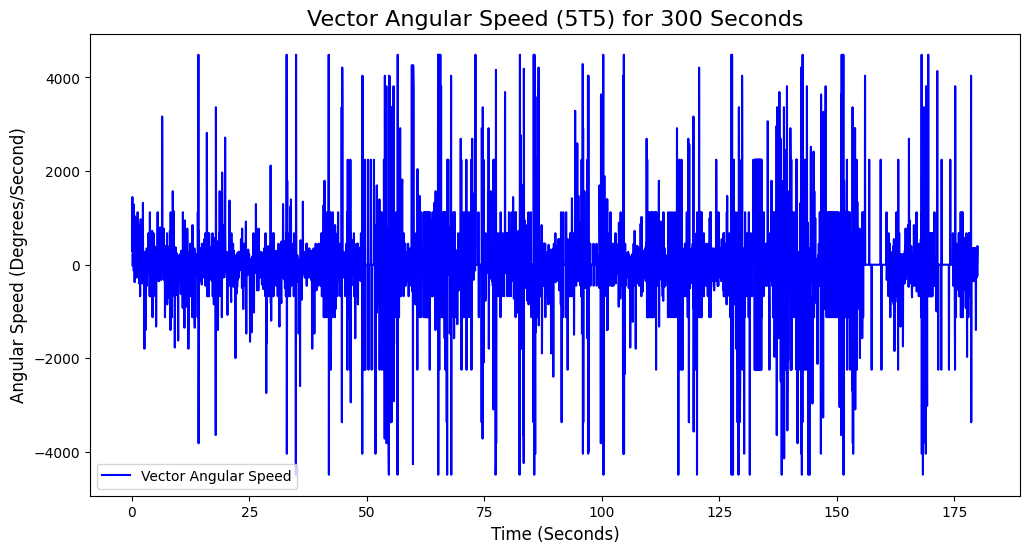

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


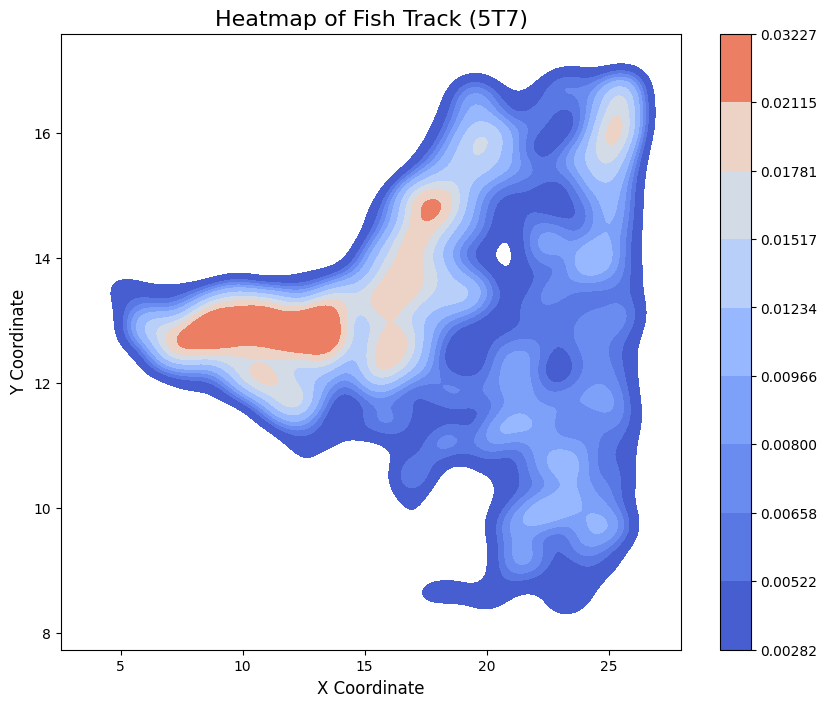

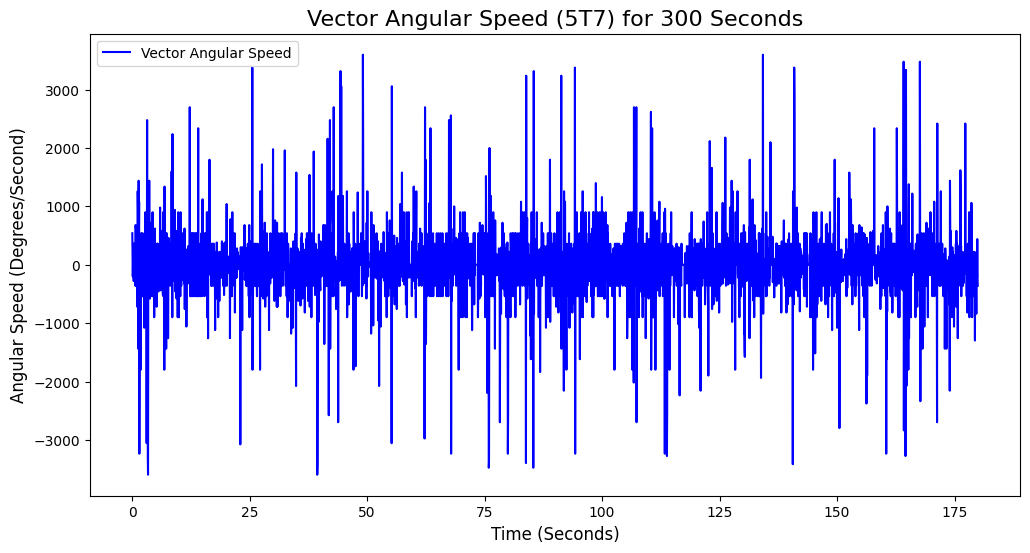

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


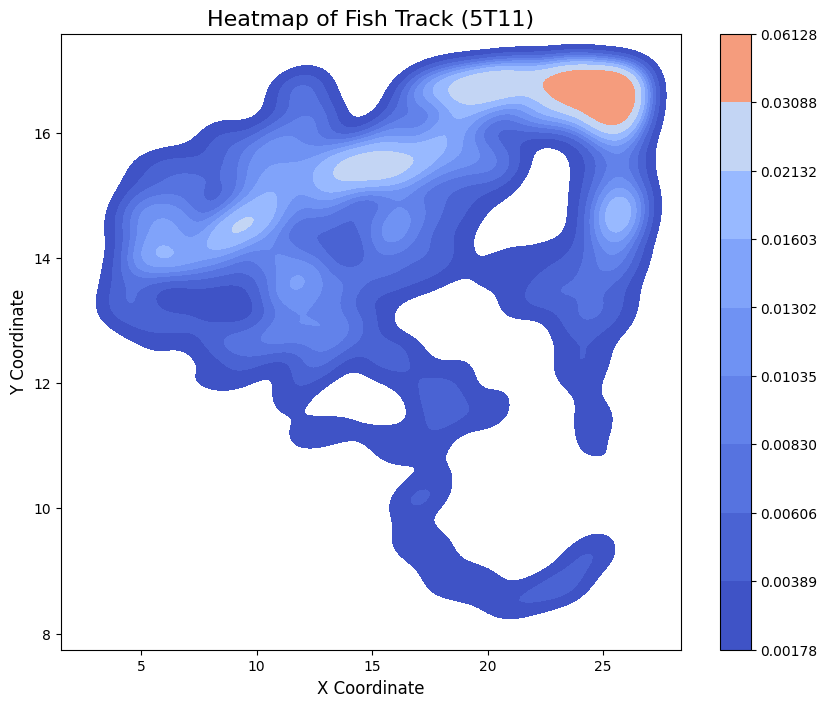

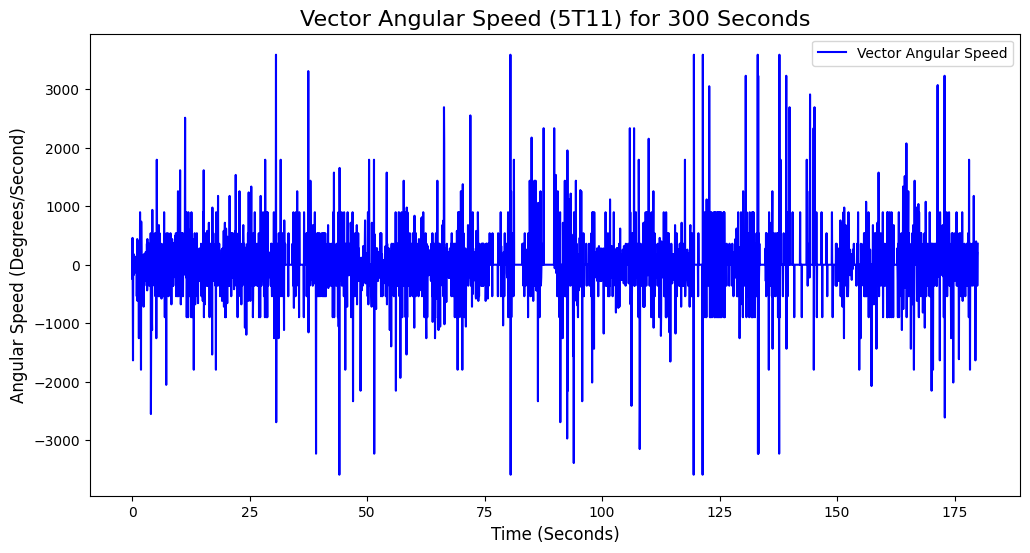

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/sinan/Downloads/avs-Track Coordinates Report.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Function to create heatmap and angular speed plot for each fish
def plot_fish_data(fish_id):
    # Filter data for the specific fish
    fish_data = data[data['Subject Name'] == fish_id]
    
    # Filter data for the first 300 seconds
    fish_data_300s = fish_data[fish_data['Sample Time (Seconds)'] <= 300]
    
    # Extract coordinates for heatmap
    coordinates = fish_data_300s[['X Coordinate', 'Y Coordinate']].dropna()

    # Extract vector angular speed
    vector_speed = fish_data_300s['Vector Angular Speed (Degrees/Second)'].dropna()
    sample_time = fish_data_300s['Sample Time (Seconds)'].iloc[:len(vector_speed)]

    # Plot heatmap of track
    plt.figure(figsize=(10, 8))
    sns.kdeplot(x=coordinates['X Coordinate'], y=coordinates['Y Coordinate'], cmap='coolwarm', fill=True, cbar=True, bw_adjust=0.5)
    plt.title(f'Heatmap of Fish Track ({fish_id})', fontsize=16)
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.show()

    # Plot Vector Angular Speed over time
    plt.figure(figsize=(12, 6))
    plt.plot(sample_time, vector_speed, label='Vector Angular Speed', color='blue')
    plt.title(f'Vector Angular Speed ({fish_id}) for 300 Seconds', fontsize=16)
    plt.xlabel('Time (Seconds)', fontsize=12)
    plt.ylabel('Angular Speed (Degrees/Second)', fontsize=12)
    plt.legend()
    plt.show()

# List of fish IDs
fish_ids = ['5T1', '5T3', '5T5', '5T7', '5T11']

# Generate plots for each fish
for fish_id in fish_ids:
    plot_fish_data(fish_id)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


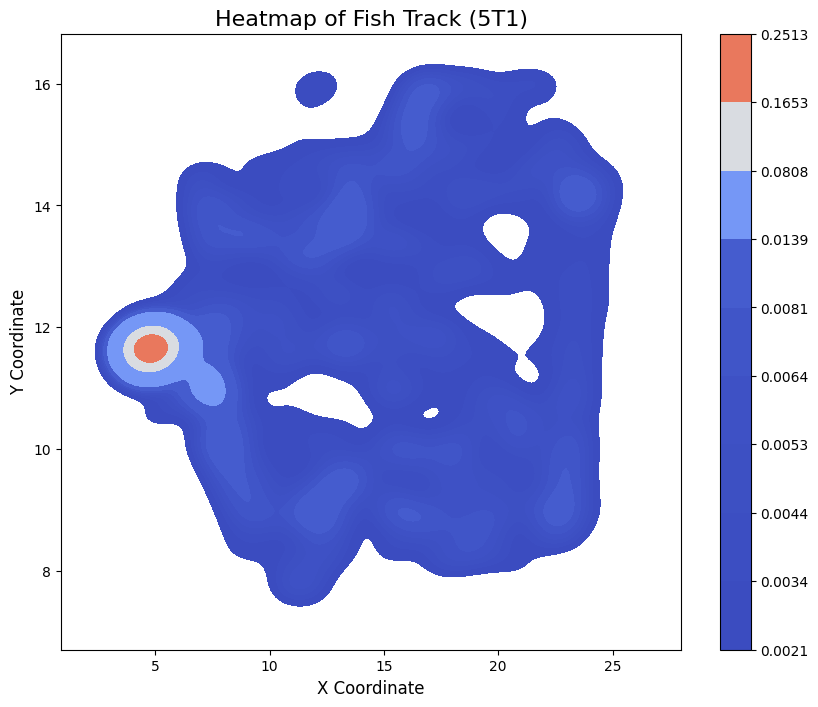

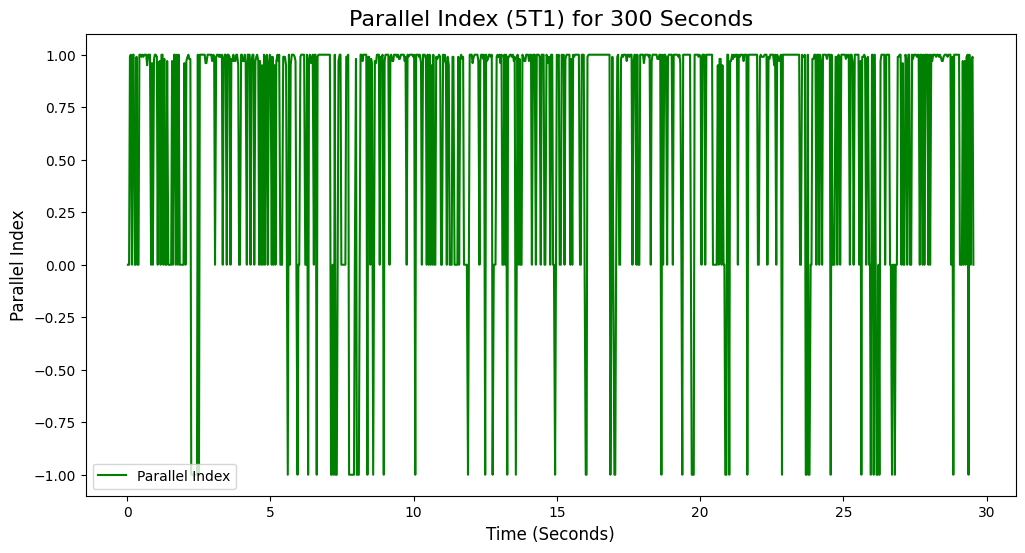

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


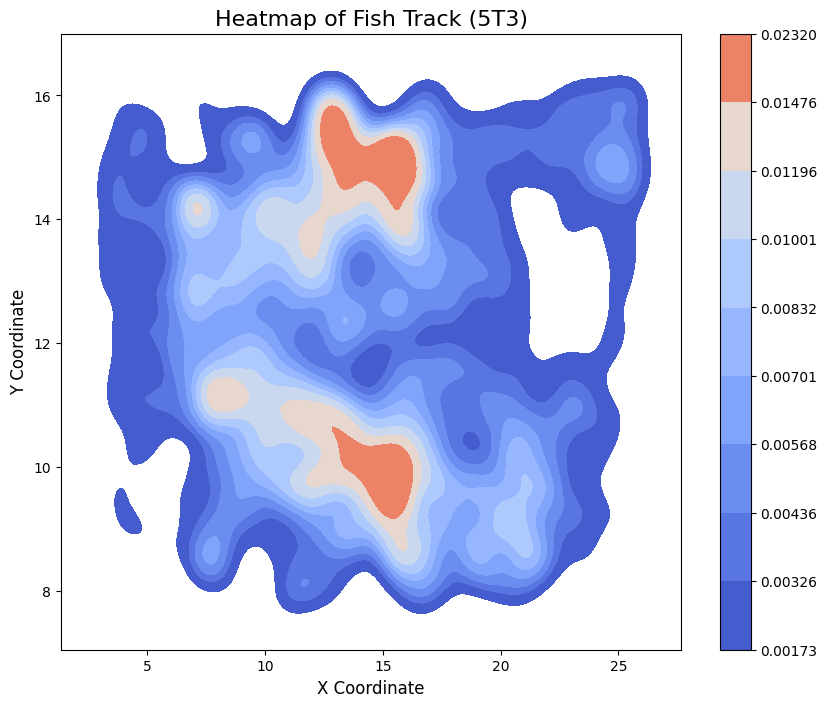

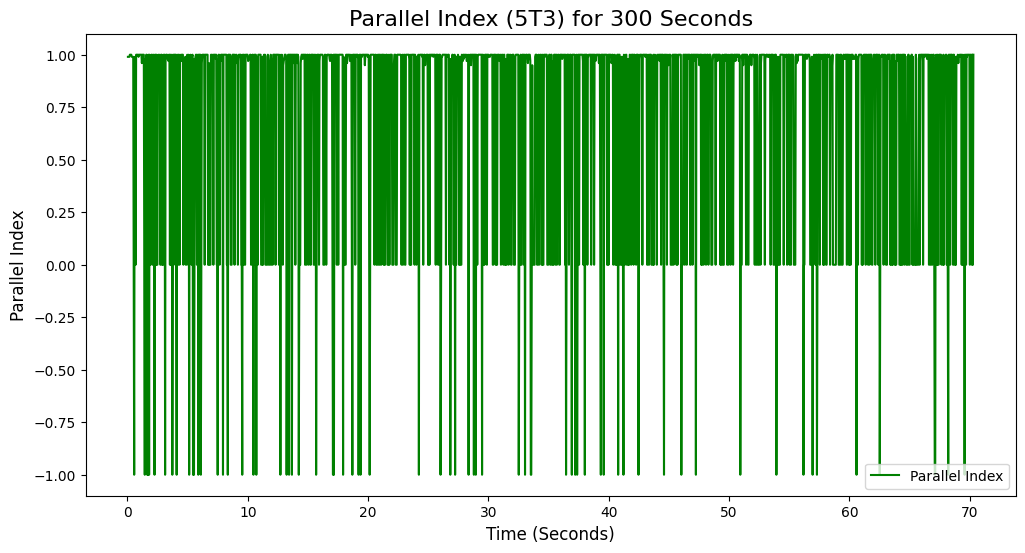

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


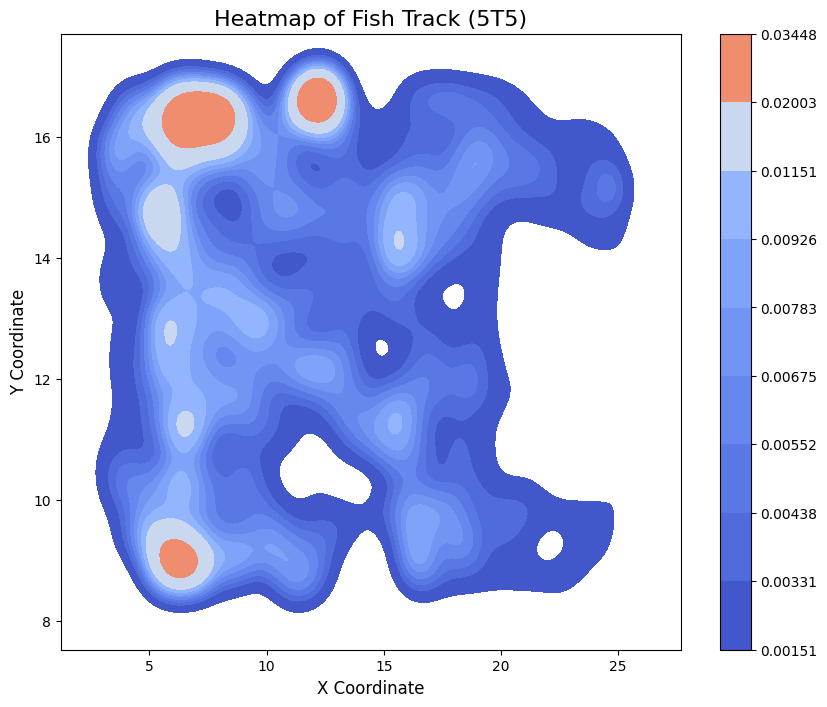

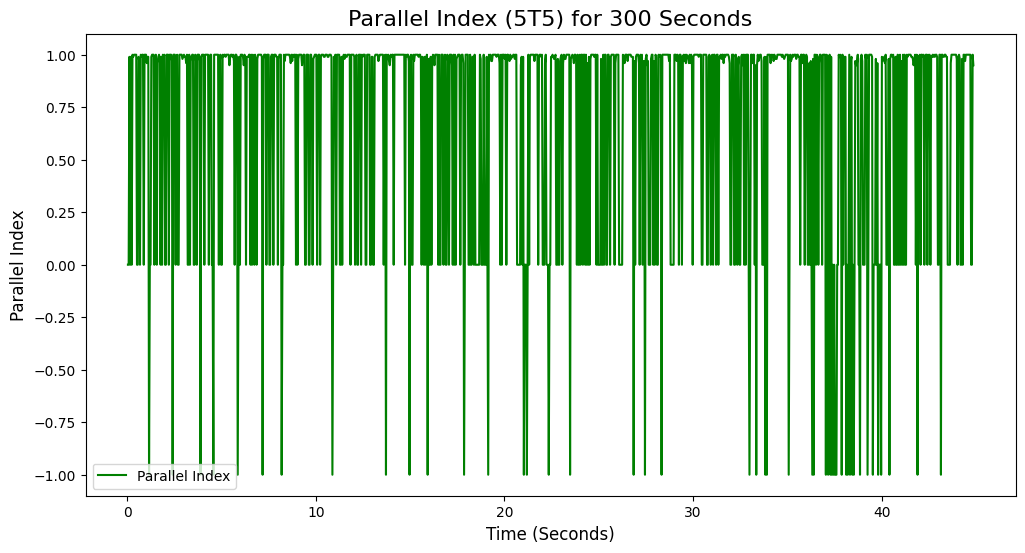

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


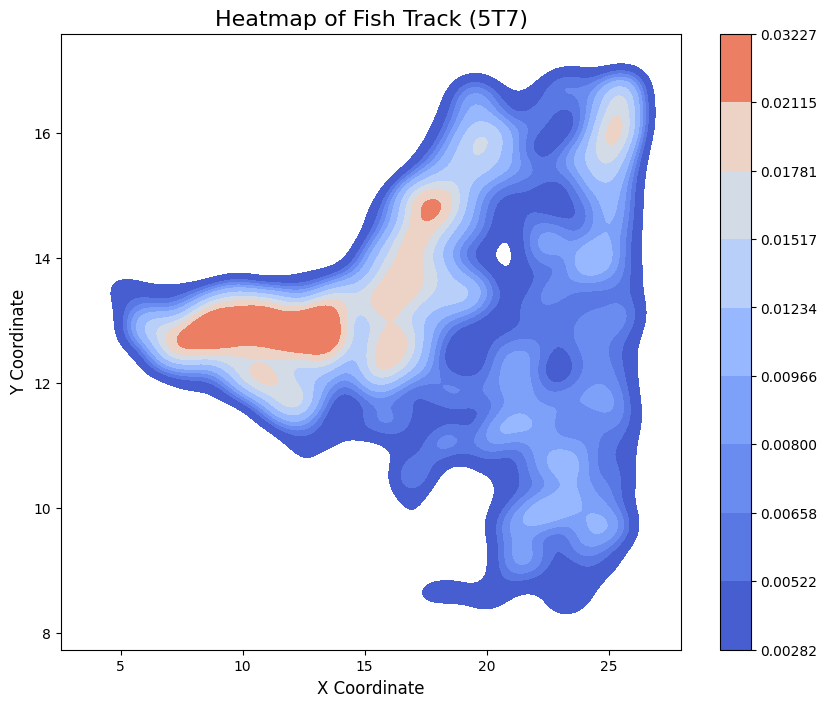

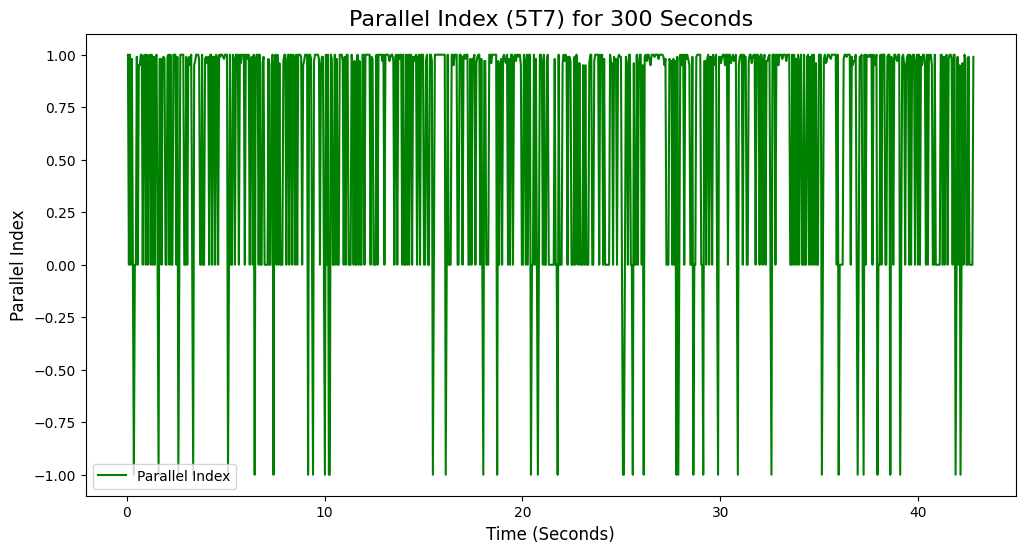

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


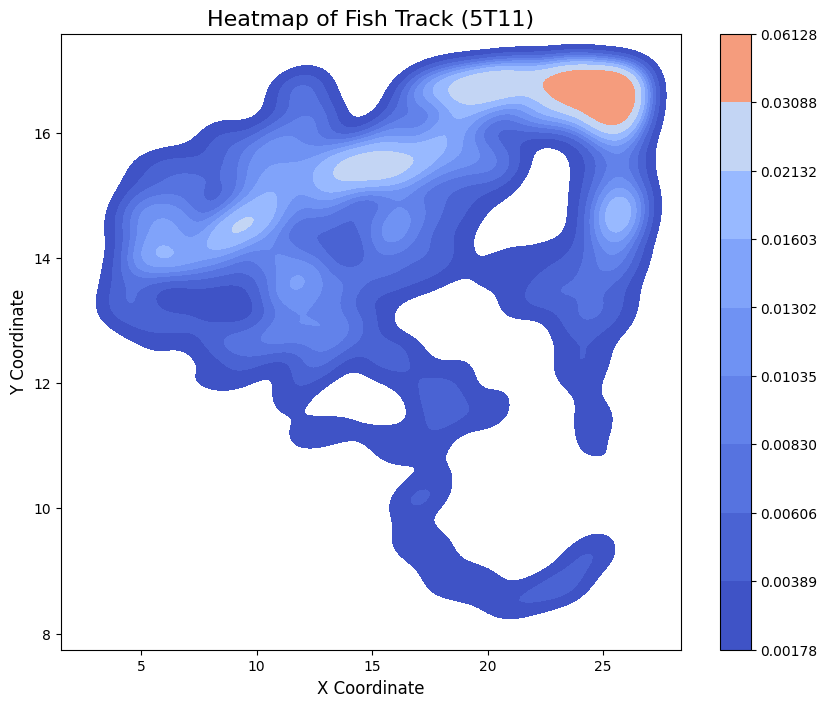

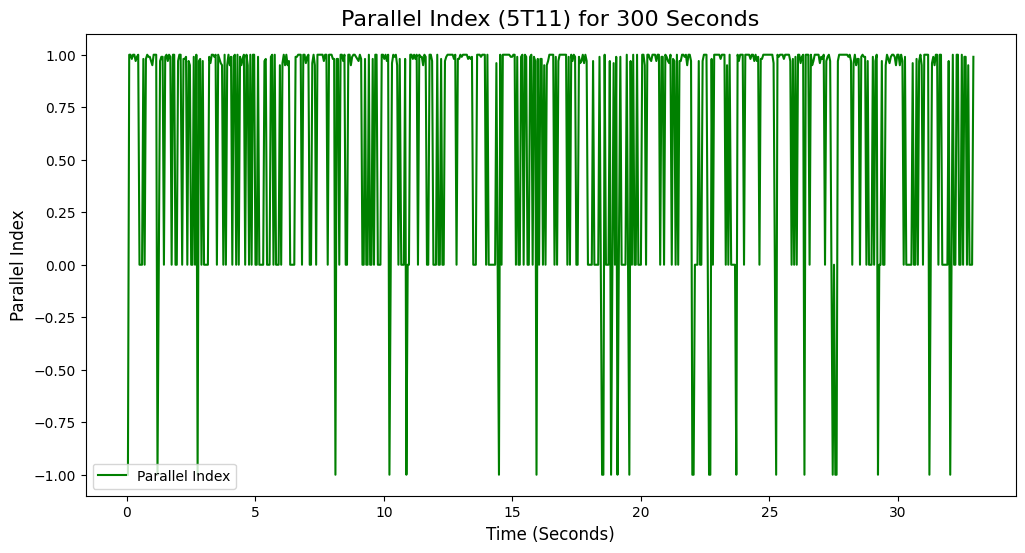

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/sinan/Downloads/avs-Track Coordinates Report.csv'  # Replace with the actual path to your file
data = pd.read_csv(file_path)

# Function to create heatmap and parallel index plot for each fish
def plot_fish_data(fish_id):
    # Filter data for the specific fish
    fish_data = data[data['Subject Name'] == fish_id]
    
    # Filter data for the first 300 seconds
    fish_data_300s = fish_data[fish_data['Sample Time (Seconds)'] <= 300]
    
    # Extract coordinates for heatmap
    coordinates = fish_data_300s[['X Coordinate', 'Y Coordinate']].dropna()

    # Extract Parallel Index
    parallel_index = fish_data_300s['Parallel Index'].dropna()
    sample_time = fish_data_300s['Sample Time (Seconds)'].iloc[:len(parallel_index)]

    # Plot heatmap of track
    plt.figure(figsize=(10, 8))
    sns.kdeplot(x=coordinates['X Coordinate'], y=coordinates['Y Coordinate'], cmap='coolwarm', fill=True, cbar=True, bw_adjust=0.5)
    plt.title(f'Heatmap of Fish Track ({fish_id})', fontsize=16)
    plt.xlabel('X Coordinate', fontsize=12)
    plt.ylabel('Y Coordinate', fontsize=12)
    plt.show()

    # Plot Parallel Index over time
    plt.figure(figsize=(12, 6))
    plt.plot(sample_time, parallel_index, label='Parallel Index', color='green')
    plt.title(f'Parallel Index ({fish_id}) for 300 Seconds', fontsize=16)
    plt.xlabel('Time (Seconds)', fontsize=12)
    plt.ylabel('Parallel Index', fontsize=12)
    plt.legend()
    plt.show()

# List of fish IDs
fish_ids = ['5T1', '5T3', '5T5', '5T7', '5T11']

# Generate plots for each fish
for fish_id in fish_ids:
    plot_fish_data(fish_id)